# Importing necessary packages

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.naive_bayes import ComplementNB
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from math import *
from sklearn.utils import shuffle
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.svm import SVC
#plotting the best parameters
import matplotlib.patches as mpatches


from pandas import Series, DataFrame
import matplotlib.pyplot as plt
from sklearn.metrics import *
from sklearn.metrics import roc_curve
import numpy as np

# Reading the collected dataset

In [2]:
path = '/Ml files/suicide ideation/Suicide Ideation Detection using natural Language Processing'

In [3]:
df = pd.read_csv(path + '/dataset/cleaned_df.csv')

# Suffling the dataset

In [4]:
df =  shuffle(df).reset_index(drop=True)
df.head()

,text,label,cleaned_text
0,"@Louisa_Woodx @DG2812 @piersmorgan No, actuall...",0,actually allow single vote vote enact another ...
1,thinks arent that easy for everyone you can b...,0,think arent easy everyone proud yet able come ...
2,it s hard not to loose myself in anger kill em...,0,hard loose anger kill em let god sort kind thi...
3,i can feel a headache coming up and the fact t...,0,feel headache come fact never meet michael cra...
4,"""If you're not talking about roundabouts at le...",1,talk roundabout least three time day life wort...


# Tokenizing the cleaned text

In [5]:
#removing shortwords
df.cleaned_text=df['cleaned_text'].astype(str)
tokenized_df=df['cleaned_text'].apply(lambda x: x.split())
tokenized_df.head(5)

0    [actually, allow, single, vote, vote, enact, a...
1    [think, arent, easy, everyone, proud, yet, abl...
2    [hard, loose, anger, kill, em, let, god, sort,...
3    [feel, headache, come, fact, never, meet, mich...
4    [talk, roundabout, least, three, time, day, li...
Name: cleaned_text, dtype: object

In [6]:
df['cleaned_text']=df['cleaned_text'].apply(lambda x: " ".join([w for w in x.split() if len(w)>3]))
df.head(5)

,text,label,cleaned_text
0,"@Louisa_Woodx @DG2812 @piersmorgan No, actuall...",0,actually allow single vote vote enact another ...
1,thinks arent that easy for everyone you can b...,0,think arent easy everyone proud able come know...
2,it s hard not to loose myself in anger kill em...,0,hard loose anger kill sort kind thing father h...
3,i can feel a headache coming up and the fact t...,0,feel headache come fact never meet michael cra...
4,"""If you're not talking about roundabouts at le...",1,talk roundabout least three time life worthles...


# Feature extraction with Count Vectorizer

In [7]:
token = RegexpTokenizer(r'[a-zA-Z0-9]+')
cv = CountVectorizer(stop_words='english',ngram_range = (1,1),tokenizer = token.tokenize)
text_counts = cv.fit_transform(df['cleaned_text'].values.astype('U'))

# Train test split
80% as training data and 20% as testing data

In [8]:
from sklearn.model_selection import train_test_split
X=text_counts
y=df['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=19)

In [9]:
print("x_train: ",X_train.shape)
print("x_test: ",X_test.shape)
print("y_train: ",y_train.shape)
print("y_test: ",y_test.shape)

x_train:  (39342, 37744)
x_test:  (9836, 37744)
y_train:  (39342,)
y_test:  (9836,)


# Confusion Matrix

In [10]:
def plot_cm(y_true, y_pred,filename, figsize=(8,8)):
    cm = confusion_matrix(y_true, y_pred, labels=np.unique(y_true))
    cm_sum = np.sum(cm, axis=1, keepdims=True)
    cm_perc = cm / cm_sum.astype(float) * 100
    annot = np.empty_like(cm).astype(str)
    nrows, ncols = cm.shape
    for i in range(nrows):
        for j in range(ncols):
            c = cm[i, j]
            p = cm_perc[i, j]
            if i == j:
                s = cm_sum[i]
                annot[i, j] = '%.1f%%\n%d' % (p, s)
            elif c == 0:
                annot[i, j] = ''
            else:
                annot[i, j] = '%.1f%%\n%d' % (p, c)
    cm = pd.DataFrame(cm, index=['non-suicidal', 'suicidal'], columns=['non-suicidal', 'suicidal'])
    sns.set(font_scale=2) # Adjust to fit
    cm.index.name = 'Actual'
    cm.columns.name = 'Predicted'

    fig, ax = plt.subplots(figsize=figsize)
    sns.heatmap(cm, cmap= "Blues", annot=annot, fmt='', ax=ax)
    plt.ylabel('True label',fontsize=18)
    plt.xlabel('Predicted label',fontsize=18)
    plt.xticks( rotation=0, weight = 'bold')
    plt.yticks( rotation=90, weight = 'bold')
    plt.show()
    plt.close()

# Training the models

In [11]:
def Model(model,name):
    model.fit(X_train,y_train)
    cross = cross_val_score(model, X, y, cv = 10, n_jobs = -1,scoring = 'accuracy')
    print("Cross Validation score = ",cross)
    model_train_score = model.score(X_train, y_train)
    model_test_score = model.score(X_test, y_test)
    prediction = model.predict(X_test)
    print('{} Trainng Score {}\n'.format(name,model_train_score))
    print('{} Testing Score {}\n'.format(name,model_test_score))
    plot_cm(y_test, prediction,name)
    return cross

## MultinomialNB

Cross Validation score =  [0.84546564 0.86010573 0.85725905 0.85237902 0.86071574 0.85034567
 0.85136234 0.84871899 0.86739882 0.8497051 ]
Multinomial Naive Bayes Trainng Score 0.9111636419094098

Multinomial Naive Bayes Testing Score 0.8507523383489223



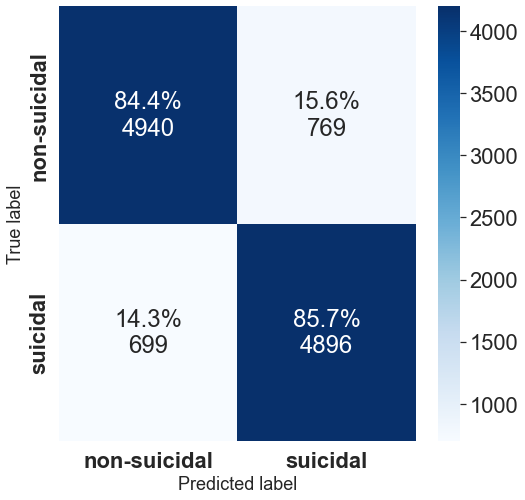

In [12]:

MNB = MultinomialNB(alpha=0.15,fit_prior=True, class_prior=None)
MNB_model = Model(MNB,"Multinomial Naive Bayes")

## SGD classifier

Cross Validation score =  [0.92130948 0.91520943 0.91703945 0.91459943 0.91581944 0.91256608
 0.91317609 0.91703945 0.91925971 0.91844621]
SGD classifier Trainng Score 0.9499771236846118

SGD classifier Testing Score 0.9136844245628304



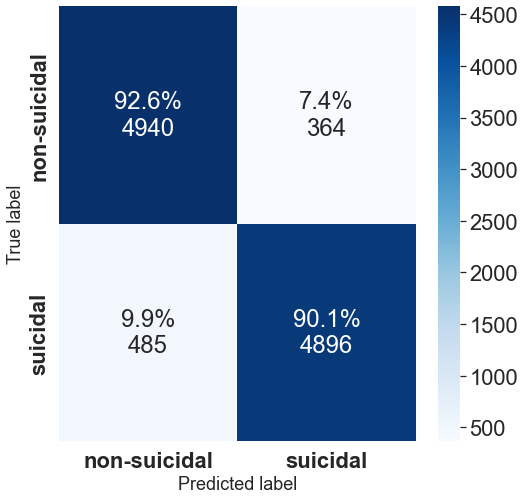

In [13]:

SGD = SGDClassifier(loss='hinge', penalty='l2', alpha=1e-4, random_state=42, max_iter=200, tol=None)
SGD_model = Model(SGD,"SGD classifier")

## Logistic Regression

Cross Validation score =  [0.92130948 0.91337942 0.91886946 0.91317609 0.91480277 0.91154941
 0.91073607 0.92090281 0.91986984 0.91458206]
Logistic Regression classifier Trainng Score 0.9501042143256571

Logistic Regression classifier Testing Score 0.91470109800732



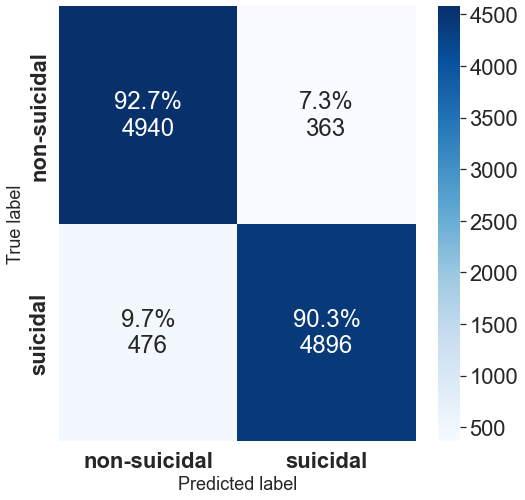

In [14]:

LR = LogisticRegression(penalty='l2',multi_class='ovr',solver='liblinear',C=0.8,random_state=42,tol=0.0001,max_iter=200)
LR_model = Model(LR,"Logistic Regression classifier")

## Random Forest Classifier

Cross Validation score =  [0.93574624 0.93411956 0.93411956 0.93127288 0.93452623 0.93188288
 0.93269622 0.9343229  0.93736018 0.93675005]
Randomforrenst classifier Trainng Score 0.9985003304356668

Randomforrenst classifier Testing Score 0.9327978853192355



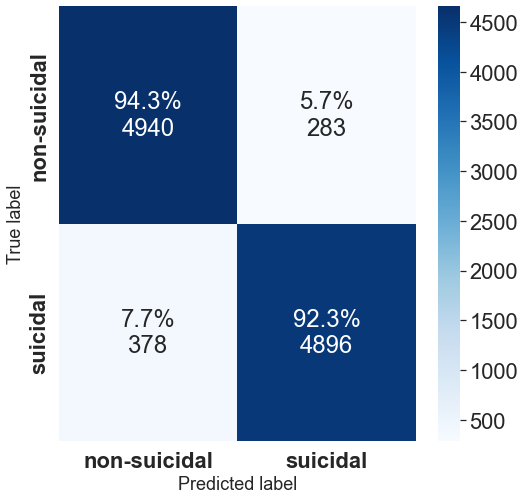

In [15]:
RF = RandomForestClassifier(n_estimators=200,criterion ='entropy')
RF_model = Model(RF,"Randomforrenst classifier")

## SVC

Cross Validation score =  [0.92008947 0.91744612 0.92578284 0.91846279 0.91846279 0.91805612
 0.9143961  0.92761285 0.92637787 0.92576774]
Support Vector classifier Trainng Score 0.9545269686340297

Support Vector classifier Testing Score 0.9220211468076454



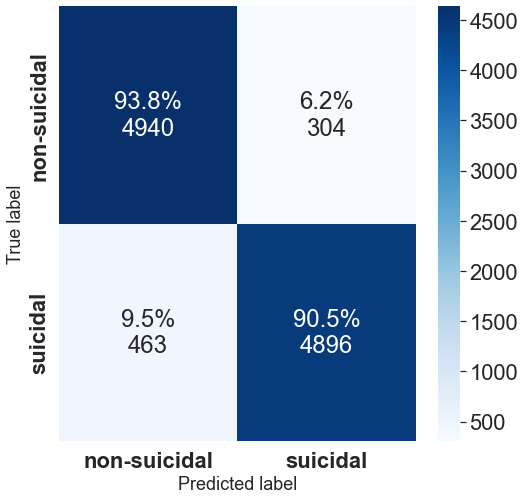

In [16]:
SVC = SVC(random_state=42)
SVC_model = Model(SVC,"Support Vector classifier")

## XGB

In [17]:
!pip install xgboost

Cross Validation score =  [0.87962586 0.8798292  0.87901586 0.87759252 0.8798292  0.87840586
 0.88186255 0.88796259 0.88021151 0.88448241]
XGB classifier Trainng Score 0.8990646128819074

XGB classifier Testing Score 0.8867425782838553



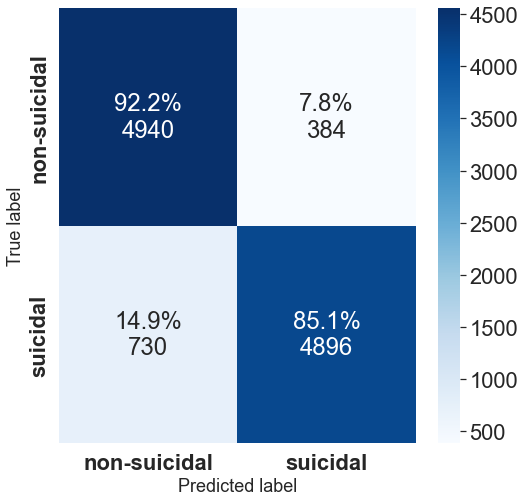

In [18]:
import xgboost as xgb
XGB = xgb.XGBClassifier(n_jobs=1)
XGB_model = Model(XGB,"XGB classifier")

## Passive Aggressive Classifier

Cross Validation score =  [0.89629931 0.87820252 0.8857259  0.88226922 0.88491257 0.87860919
 0.87860919 0.8857259  0.8922107  0.89648159]
Passive Aggressive Classifier Trainng Score 0.97699659397082

Passive Aggressive Classifier Testing Score 0.87647417649451



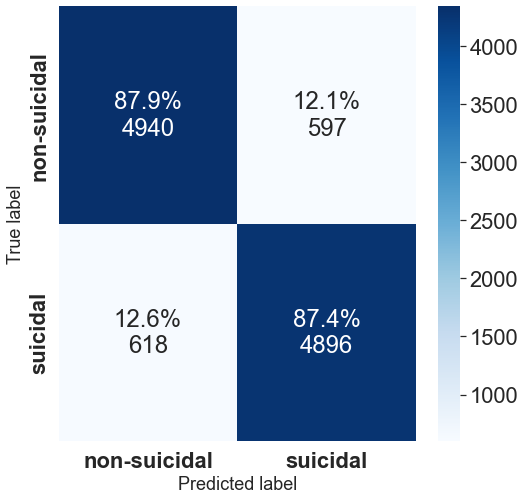

In [19]:
from sklearn.linear_model import PassiveAggressiveClassifier
PAG = PassiveAggressiveClassifier(random_state=42,max_iter=500,tol=None)
PAG_model = Model(PAG,"Passive Aggressive Classifier")

# Performance comparison

In [28]:
MLA = {
    'MNB' : MNB,
    'SGD' : SGD,
    'LR' : LR,
    'RF' : RF,
    'SVC' : SVC,
    'XGB' : XGB,
    'PAG' : PAG,
}

In [32]:
columns = []
compare = pd.DataFrame(columns = columns)
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes=4
row_index = 0
for name,alg in MLA.items():
    MLA_name = name
    predicted = alg.predict(X_test)
    auc_score = roc_auc_score(y_test, predicted)
    micro_averaged_recall = recall_score(y_test, predicted, average = 'macro')
    macro_averaged_f1 = f1_score(y_test, predicted, average = 'macro')
    precisions =precision_score(y_test, predicted, average = 'micro')
    
    compare.loc[row_index,'Name'] = MLA_name
    compare.loc[row_index, 'Test Accuracy'] = round(alg.score(X_test, y_test), 4)
    compare.loc[row_index, 'AUC'] = auc_score
    compare.loc[row_index, 'Precision'] = precisions
    compare.loc[row_index, 'Recall'] = micro_averaged_recall
    compare.loc[row_index, 'F1 Score'] = macro_averaged_f1
    row_index+=1
    
compare.sort_values(by = ['Test Accuracy'], ascending = False, inplace = True)    
compare

,Name,Test Accuracy,AUC,Precision,Recall,F1 Score
3,RF,0.9328,0.932753,0.932798,0.932753,0.932784
4,SVC,0.9220,0.921947,0.922021,0.921947,0.921988
2,LR,0.9147,0.914648,0.914701,0.914648,0.914679
1,SGD,0.9137,0.913628,0.913684,0.913628,0.913660
5,XGB,0.8867,0.886583,0.886743,0.886583,0.886564
6,PAG,0.8765,0.876462,0.876474,0.876462,0.876469
0,MNB,0.8508,0.850781,0.850752,0.850781,0.850751


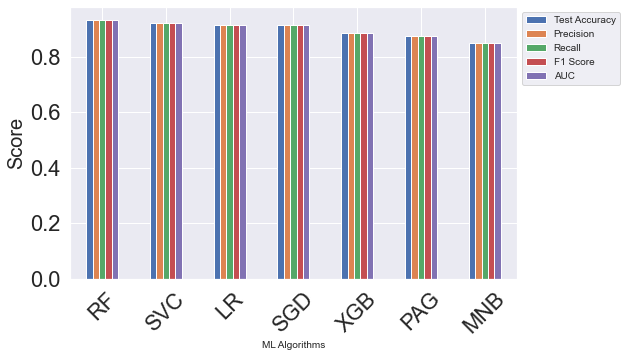

In [33]:
#plot comaparison 
compare.plot(x="Name", y=["Test Accuracy", "Precision", "Recall", "F1 Score", "AUC"], kind="bar",figsize=(8, 5))
plt.xlabel('ML Algorithms',fontsize=10)
plt.ylabel('Score',fontsize=20)
plt.xticks(rotation = 45)
plt.legend(loc = 2, bbox_to_anchor = (1,1),prop={'size': 10})
plt.show()

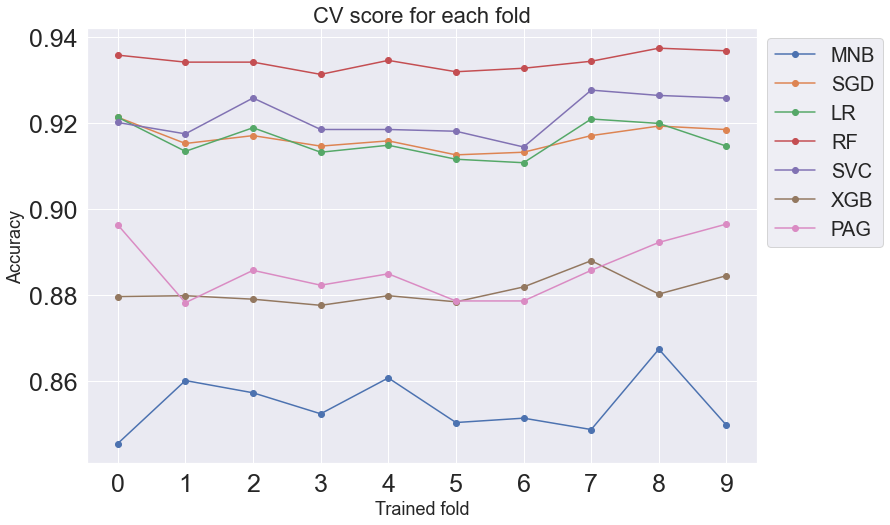

In [34]:
plt.figure(figsize=(12,8))
n_folds=10
plt.plot(MNB_model,marker='o')
plt.plot(SGD_model,marker='o')
plt.plot(LR_model,marker='o')
plt.plot(RF_model,marker='o')
plt.plot(SVC_model,marker='o')
plt.plot(XGB_model,marker='o')
plt.plot(PAG_model,marker='o')
plt.title('CV score for each fold',fontsize=22)
plt.ylabel('Accuracy',fontsize=18)
plt.xlabel('Trained fold',fontsize=18)
plt.xticks([k for k in range(n_folds)])
plt.tick_params(axis='x',rotation=0,labelsize=25)
plt.tick_params(axis='y',rotation=0,labelsize=25)
plt.legend(['MNB', 'SGD', 'LR', 'RF', 'SVC', 'XGB', 'PAG', ], loc=2,bbox_to_anchor = (1,1), prop={'size': 20})
plt.show()